In [10]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.patches as patches
import os
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [11]:
#import the data
ds_era = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/era5/2021.h5')


ds_fcn_21 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/2021_dt_list_ens_backtransformed.nc',engine = 'netcdf4')


ds_fcn_ecmwf = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210704_00_backtransformed.nc')


ds_ecmwf = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210702_00_sfc.nc')






In [12]:
maxval = ds_era.fields[700,2,260:40:-1,720:1200].max()
minval = ds_era.fields[700,2,260:40:-1,720:1200].min()
levels = np.linspace(minval, maxval, 20)

Text(0, 0.5, 'Latitude')

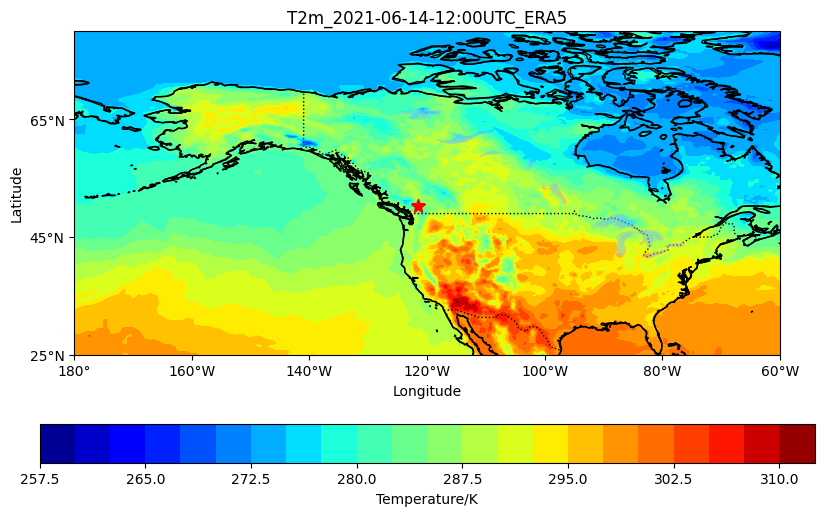

In [17]:
#ERA5 plots

#lat = ds_fcn_21['phony_dim_4']
#lon = ds_fcn_21['phony_dim_5']

#lat= ds_era['phony_dim_2']
#lon= ds_era['phony_dim_3']
#phony_dim_2(260,40,-1)
#pholat= ds_era['phony_dim_2'][260:40:-1]ny_dim_3= slice(720,1200)

#ds_era.fields

#ds_era_tr = ds_era.transpose('phony_dim_0','phony_dim_1','phony_dim_3','phony_dim_2')

#lat= ds_era['phony_dim_2']
#lon= ds_era['phony_dim_3'][720:1200]

lat = np.linspace(25, 80, 220)
lon = np.linspace(-180, -60, 480)
lon_grid, lat_grid = np.meshgrid(lon, lat)


ds_era_t2m = ds_era.fields[657,2,260:40:-1,720:1200]


# Set the CARTOPY_USER_BACKGROUNDS environment variable
#os.environ['CARTOPY_USER_BACKGROUNDS'] = '/home/kit/imk-tro/gj5173/'

# Assuming you have latitude ('lat'), longitude ('lon'), and temperature ('temperature') variables

# Create a figure and axis with Cartopy projection
fig = plt.figure(figsize=(10,6))
#proj = ccrs.PlateCarree(central_longitude=-120)
#ax = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax = plt.axes(projection=ccrs.PlateCarree())
#proj = ccrs.PlateCarree(central_longitude=-120) 


# Set up the map projection
#projection = 'merc'  # Choose the desired projection
#fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree() })

# Convert coordinates to map projection
x, y = lon_grid, lat_grid  # Replace with the appropriate transformation method






leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent

#f2_ax1 = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
                  


# Add map 
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='w')


ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())

lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Plot the contour map
#contour = ax.contourf(lon,lat,ds_era.fields[656,2,260:40:-1,720:1200],cmap='jet',levels=20)
contour1 = ax.contourf(x,y,ds_era_t2m,cmap='jet',levels = 21)
#mark the location of lytton
red_point_lon = -121.50
red_point_lat = 50.25
ax.plot(red_point_lon, red_point_lat, 'r*', markersize=10)
# Add colorbar
#plt.colorbar()
cbar = plt.colorbar(contour1, ax=ax, label='Temperature/K',orientation='horizontal')


# Set plot title and labels
plt.title('T2m_2021-06-14-12:00UTC_ERA5')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#plt.savefig('T2m_2021-06-14_ERA5.png', bbox_inches='tight',dpi=100)

#656:2021.06.14 00UTC -06.29 00UTC

# Show the plot
#plt.show()

Text(0, 0.5, 'Latitude')

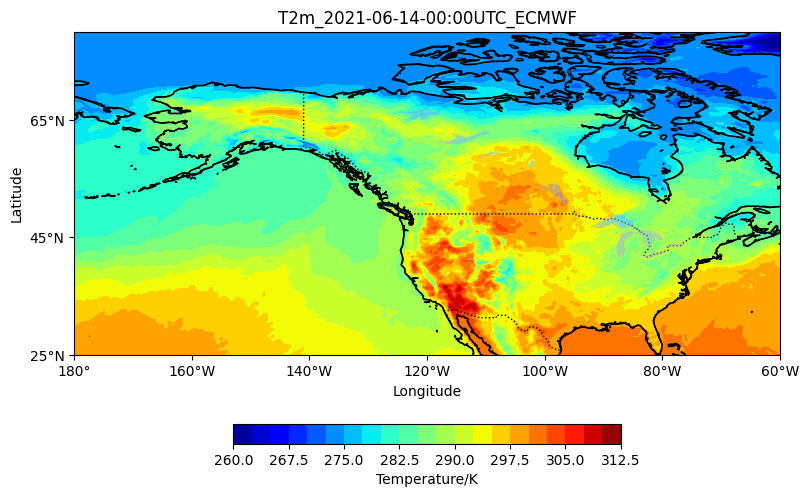

In [14]:
#ecmwf plots 

# Set the CARTOPY_USER_BACKGROUNDS environment variable
#os.environ['CARTOPY_USER_BACKGROUNDS'] = '/home/kit/imk-tro/gj5173/'

# Assuming you have latitude ('lat'), longitude ('lon'), and temperature ('temperature') variables

# Create a figure and axis with Cartopy projection
fig3 = plt.figure(figsize=(10,6))
#proj = ccrs.PlateCarree(central_longitude=-120)
#ax1 = fig2.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax3 = plt.axes(projection=ccrs.PlateCarree())
#proj = ccrs.PlateCarree(central_longitude=-120) 

leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent

#f2_ax1 = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax3.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
lon_ec = ds_ecmwf['longitude']
lat_ec = ds_ecmwf['latitude']
                  
# Add map features
ax3.add_feature(cfeature.COASTLINE)
ax3.add_feature(cfeature.BORDERS, linestyle=':')
ax3.add_feature(cfeature.LAND, facecolor='lightgray')
ax3.add_feature(cfeature.OCEAN, facecolor='w')


ax3.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax3.add_feature(cfeature.LAKES, alpha=0.5)
ax3.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax3.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())

lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()

ax3.xaxis.set_major_formatter(lon_formatter)
ax3.yaxis.set_major_formatter(lat_formatter)

# Plot the contour map
#contour = ax.contourf(lon,lat,ds_era.fields[676,2,260:40:-1,720:1200],cmap='jet',levels=20)
#phony_dim_4-lat phony_dim_5-lon phony_dim_0-leadtime(21) phony_dim_2-time 57(0:ground truth,intervel:6h,start from 2021.06.14 00UTC,) phony_dim_1-pertubated members phony_dim_3:variables
#assume time intervel in lead time is 3h
#lead time: 18 36 54 72
#time 2021.06.14-07.04UTC 00:00

#control forecast
contour3 = ax3.contourf(lon_ec,lat_ec,ds_ecmwf.t2m[5,:,:],cmap='jet',levels=20)
#ds_fcn_ecmwf.isel(phony_dim_0 = 1, phony_dim_1 = 1,phony_dim_2 = 2,phony_dim_3=slice(None,None,-1)).forecast.plot()
#control forecast

# Add colorbar
cbar = plt.colorbar(contour3, ax=ax3, label='Temperature/K',orientation='horizontal',shrink=0.5)

# Set plot title and labels
#plt.title('Temperature Contour Map')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#cbar = plt.colorbar(contour, ax=ax1, label='Temperature/K',orientation='horizontal',shrink=0.5)
plt.title('T2m_2021-06-14-00:00UTC_ECMWF')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#plt.savefig('/home/kit/imk-tro/gj5173/plots/T2m_2021-06-15_ECMWF.png', bbox_inches='tight',dpi=100)
# Show the plot
#plt.show

Text(0.5, 1.0, 'g2')

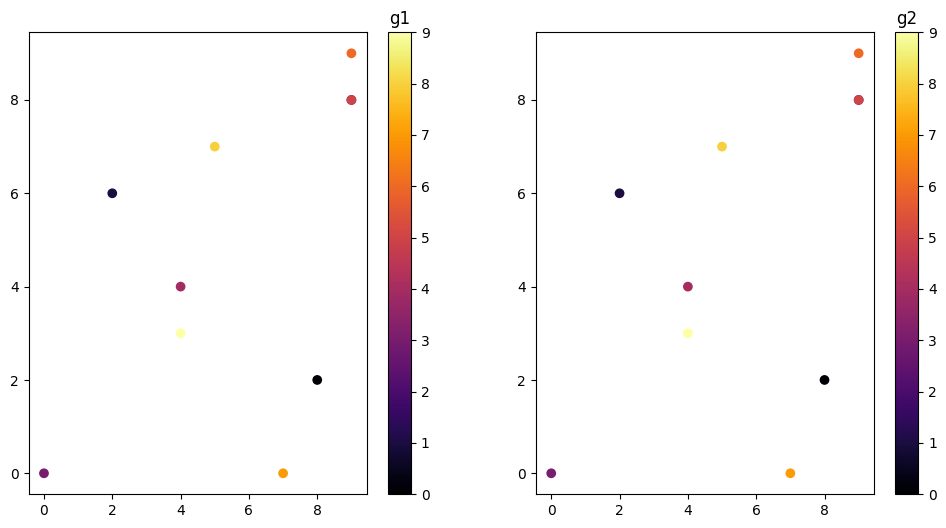

In [15]:
fig = plt.figure(figsize=(12, 6))
marker_colors = range(0,10)

x=x1=np.random.randint(0,10,10)
y=y1=np.random.randint(0,10,10)

plt.subplot(1, 2, 1)
g1=plt.scatter(x, y, c = marker_colors, cmap = "inferno")


plt.subplot(1, 2, 2)
g2=plt.scatter(x1, y1, c = marker_colors, cmap = "inferno")

g11=plt.colorbar(g1)
g12=plt.colorbar(g2)

g11.ax.set_title('g1')
g12.ax.set_title('g2')

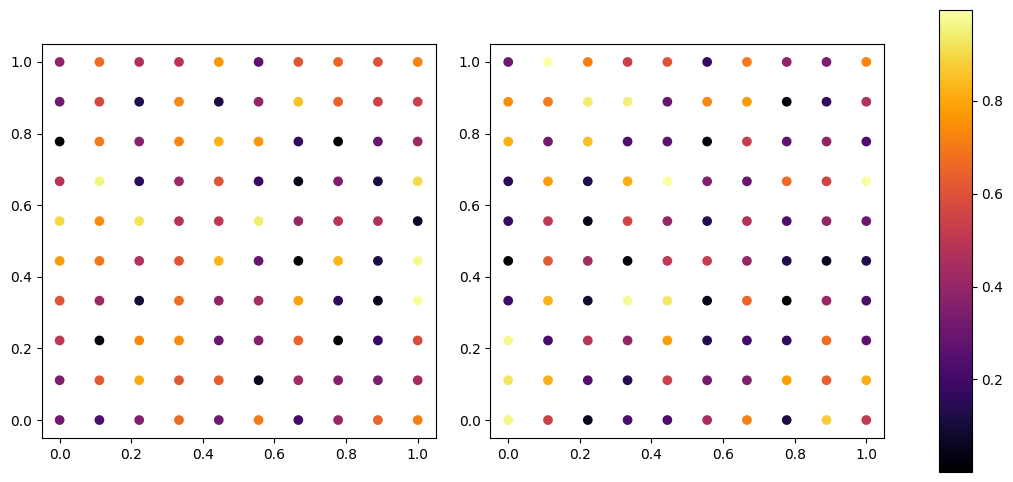

In [7]:
import numpy as np    
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
# generate some data
data, data1 = np.random.rand(10,10), np.random.rand(10,10)
x, y = np.meshgrid(np.linspace(0,1,10), np.linspace(0,1,10))

# initialize a plot-grid with 3 axes (2 plots and 1 colorbar)
gs = GridSpec(1, 3, width_ratios=[.48,.48,.04])

# set vmin and vmax explicitly to ensure that both colorbars have the same range!
vmin = np.min([np.min(data), np.min(data1)])
vmax = np.max([np.max(data), np.max(data1)])

plot_kwargs = dict(cmap = "inferno", vmin=vmin, vmax=vmax)

fig = plt.figure(figsize=(12, 6))
ax_0 = fig.add_subplot(gs[0], aspect='equal')
ax_1 = fig.add_subplot(gs[1], aspect='equal')
ax_cb = fig.add_subplot(gs[2])


s1 = ax_0.scatter(x, y, c = data, **plot_kwargs)
s2 = ax_1.scatter(x, y, c = data1, **plot_kwargs)

plt.colorbar(s1, cax=ax_cb)

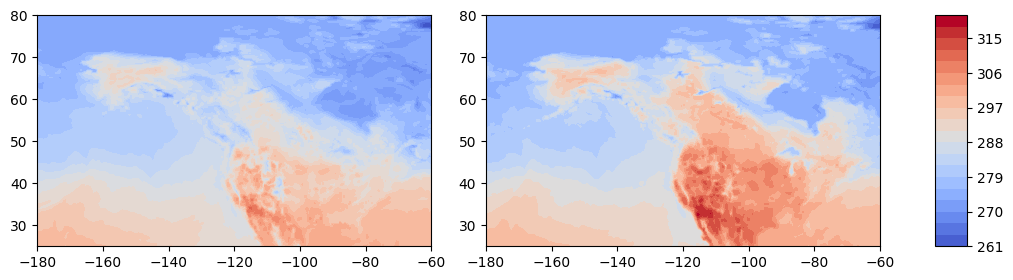

In [39]:
import numpy as np    
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

data = ds_era.fields[657,2,260:40:-1,720:1200]
data1 = ds_fcn_21.forecast[0,1,0,2,::-1,:]

# initialize a plot-grid with 3 axes (2 plots and 1 colorbar)
gs = GridSpec(1, 3, width_ratios=[.48,.48,.04])

# set vmin and vmax explicitly to ensure that both colorbars have the same range!
vmin = np.min([np.min(data), np.min(data1)])
vmax = np.max([np.max(data), np.max(data1)])


plot_kwargs = dict(cmap = "coolwarm", vmin=vmin, vmax=vmax,levels = 20)

fig = plt.figure(figsize=(12, 3))
ax_0 = fig.add_subplot(gs[0])
ax_1 = fig.add_subplot(gs[1])
ax_cb = fig.add_subplot(gs[2])


s1 = ax_0.contourf(x,y,data, **plot_kwargs)
s2 = ax_1.contourf(x, y,data1, **plot_kwargs)
#contour3 = ax3.contourf(lon_ec,lat_ec,ds_ecmwf.t2m[5,:,:],cmap='jet',levels=20)


plt.colorbar(s2, cax=ax_cb)